In [279]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
from matplotlib import pyplot
import scipy.stats
%matplotlib inline

In [164]:
fpath = 'facebook_data_bloombergmarkets_post_sentiment.tsv'
post_data = pd.read_csv(fpath, sep='\t')
post_data.head()

,ID,PostID,PostDate,Text,Likes,Shares,PositiveScore,NegativeScore,NeutralScore,SentimentScore,TokenQnt,PositiveScoreAvg,NegativeScoreAvg,NeutralScoreAvg,SentimentScoreAvg,Vader_Positive,Vader_Negative,Vader_Neutral,Vader_Compound,Flair_Score
0,1,3847873015280995,2021-05-16 00:03:09,BREAKING: Billionaire George Soros’s investmen...,0,0,0.250,0.625,16.125,-0.375,17,0.014706,0.036765,0.948529,-0.022059,0.047,0.108,0.846,-0.4404,-0.9963
1,2,3846792925389004,2021-05-15 16:09:27,LATEST: America’s millions of unused doses are...,0,0,0.125,1.250,8.625,-1.125,10,0.012500,0.125000,0.862500,-0.112500,0.105,0.093,0.802,0.0772,-0.9946
2,3,3846326078769022,2021-05-15 12:34:37,Singapore's tourism industry is racing to catc...,0,0,0.375,0.000,12.625,0.375,13,0.028846,0.000000,0.971154,0.028846,0.000,0.000,1.000,0.0000,-0.9933
3,4,3845819882152975,2021-05-15 08:30:13,Asian stocks are falling further behind their ...,0,0,0.375,1.500,10.125,-1.125,12,0.031250,0.125000,0.843750,-0.093750,0.000,0.222,0.778,-0.6908,-0.9974
4,5,3845620125506284,2021-05-15 06:41:53,"Taiwan, seen as a model for tackling Covid, ti...",0,0,0.500,0.250,15.250,0.250,16,0.031250,0.015625,0.953125,0.015625,0.000,0.000,1.000,0.0000,-0.7831


In [182]:
post_data['Vader_Average'] = post_data['Vader_Positive'] - post_data['Vader_Negative']

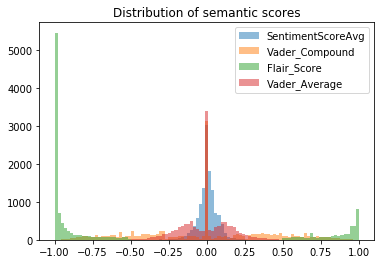

In [183]:
bins = np.linspace(-1, 1, 100)
pyplot.hist(post_data['SentimentScoreAvg'], bins, alpha=0.5, label='SentimentScoreAvg')
pyplot.hist(post_data['Vader_Compound'], bins, alpha=0.5, label='Vader_Compound')
pyplot.hist(post_data['Flair_Score'], bins, alpha=0.5, label='Flair_Score')
pyplot.hist(post_data['Vader_Average'], bins, alpha=0.5, label='Vader_Average')
pyplot.legend(loc='upper right')
pyplot.title('Distribution of semantic scores')
pyplot.show()

Text(0, 0.5, 'Posts')

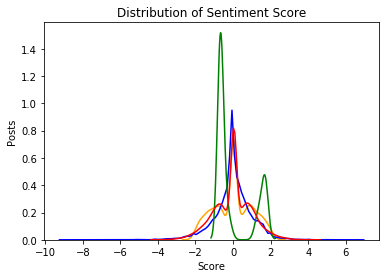

In [244]:


# seaborn histogram
sns.distplot((post_data['Vader_Compound'] - post_data['Vader_Compound'].mean())/post_data['Vader_Compound'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['SentimentScoreAvg'] - post_data['SentimentScoreAvg'].mean())/post_data['SentimentScoreAvg'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Flair_Score'] - post_data['Flair_Score'].mean())/post_data['Flair_Score'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})
sns.distplot((post_data['Vader_Average'] - post_data['Vader_Average'].mean())/post_data['Vader_Average'].std(), hist=False, kde=True, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Distribution of Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Posts')

In [185]:
post_data[['SentimentScoreAvg','Vader_Compound','Flair_Score','Vader_Average']].describe()

,SentimentScoreAvg,Vader_Compound,Flair_Score,Vader_Average
count,12274.000000,12274.000000,12274.000000,12274.000000
mean,0.004533,-0.013559,-0.435660,-0.006331
std,0.061284,0.435768,0.814136,0.157698
min,-0.541667,-0.975300,-1.000000,-0.624000
25%,-0.020833,-0.340000,-0.997300,-0.107000
50%,0.000000,0.000000,-0.960500,0.000000
75%,0.035714,0.318200,0.620475,0.093000
max,0.410714,0.984200,0.999900,0.652000


In [165]:
post_data['PostDate'] = pd.to_datetime(post_data['PostDate'], errors='coerce')

post_data['DateMonth'] = post_data['PostDate'].dt.strftime('%Y-%m')
post_data['DateDay'] = post_data['PostDate'].dt.strftime('%Y-%m-%d')

In [166]:
post_data_token['DateDay'].head()

0    2021-04-05
1    2021-04-05
2    2021-04-05
3    2021-04-05
4    2021-04-05
Name: DateDay, dtype: object

In [167]:
post_data_token['DateMonth'].head()

0    2021-04
1    2021-04
2    2021-04
3    2021-04
4    2021-04
Name: DateMonth, dtype: object

In [186]:
Monthly_Data = post_data.groupby('DateMonth').agg({'SentimentScore': 'sum'
                                                         ,'TokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'Flair_Score':'mean'})

In [187]:
DailyData = post_data.groupby('DateDay').agg({'SentimentScore': 'sum'
                                                         ,'TokenQnt':'count'
                                                        ,'Vader_Compound':'mean'
                                                        ,'Vader_Average': 'mean'
                                                        ,'Flair_Score':'mean'})

In [188]:
DailyData['SentimentScoreAdj'] = DailyData['SentimentScore']/DailyData['TokenQnt']
Monthly_Data['SentimentScoreAdj'] = Monthly_Data['SentimentScore']/Monthly_Data['TokenQnt']


In [189]:
DailyData.head()

,SentimentScore,TokenQnt,Vader_Compound,Vader_Average,Flair_Score,SentimentScoreAdj
DateDay,,,,,,
2011-06-17,0.000,4,0.124575,0.0330,0.427275,0.0000
2011-06-20,0.750,1,0.636900,0.3180,-0.911500,0.7500
2011-06-21,0.000,2,-0.411250,-0.0945,-0.967300,0.0000
2011-06-22,1.125,2,0.461400,0.1830,0.938050,0.5625
2011-06-23,-0.250,2,0.473450,0.1575,-0.002450,-0.1250


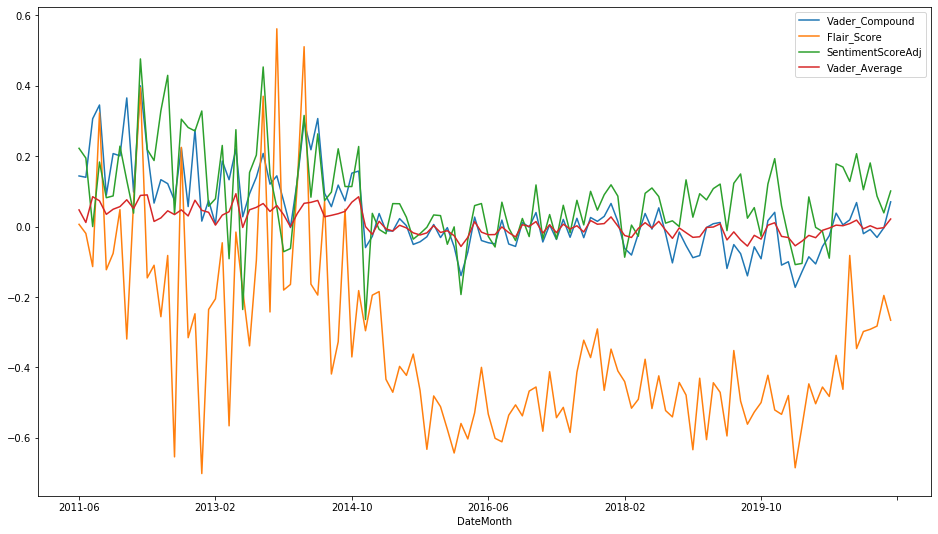

In [190]:
Monthly_Data[['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']].plot(legend=True, figsize=(16,9))

## Download S&P from Yahoo

In [335]:
SnP_daily = web.get_data_yahoo('^GSPC','10/01/2014','05/01/2021',interval='d')
SnP_monthly = web.get_data_yahoo('^GSPC','10/01/2014','05/01/2021',interval='m')

In [336]:
SnP_monthly

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-10-01,2018.189941,1820.660034,1971.439941,2018.050049,93714040000,2018.050049
2014-11-01,2075.760010,2001.010010,2018.209961,2067.560059,63600190000,2067.560059
2014-12-01,2093.550049,1972.560059,2065.780029,2058.899902,80743820000,2058.899902
2015-01-01,2072.360107,1988.119995,2058.899902,1994.989990,77330040000,1994.989990
2015-02-01,2119.590088,1980.900024,1996.670044,2104.500000,68775560000,2104.500000
...,...,...,...,...,...,...
2021-01-01,3870.899902,3662.709961,3764.610107,3714.239990,105548790000,3714.239990
2021-02-01,3950.429932,3725.620117,3731.169922,3811.149902,98596960000,3811.149902
2021-03-01,3994.409912,3723.340088,3842.510010,3972.889893,120863560000,3972.889893


In [337]:
SnP_daily['LogReturn'] = np.log(SnP_daily['Adj Close']/SnP_daily['Adj Close'].shift(1))

In [338]:
SnP_monthly.index = SnP_monthly.index.strftime('%Y-%m')

In [339]:
SnP_monthly['LogReturn'] = np.log(SnP_monthly['Adj Close']/SnP_monthly['Adj Close'].shift(1))

## Granger test

In [340]:
Granger_data_daily = pd.merge(SnP_daily,DailyData, how= 'inner', left_index=True, right_index=True)

In [341]:
Granger_data_monthly = pd.merge(SnP_monthly,Monthly_Data, how= 'inner', left_index=True, right_index=True)

In [342]:
#Granger_data['SS_LogReturn'] = np.log((Granger_data['SentimentScoreAdj']+1)/(Granger_data['SentimentScoreAdj']+1).shift(1))

In [343]:
Granger_data_monthly

,High,Low,Open,Close,Volume,Adj Close,LogReturn,SentimentScore,TokenQnt,Vader_Compound,Vader_Average,Flair_Score,SentimentScoreAdj
2014-10,2018.189941,1820.660034,1971.439941,2018.050049,93714040000,2018.050049,NaN,2.500000,22,0.151732,0.069136,-0.370218,0.113636
2014-11,2075.760010,2001.010010,2018.209961,2067.560059,63600190000,2067.560059,0.024237,2.500000,11,0.157509,0.084636,-0.181855,0.227273
2014-12,2093.550049,1972.560059,2065.780029,2058.899902,80743820000,2058.899902,-0.004197,-2.375000,9,-0.059733,-0.000111,-0.295867,-0.263889
2015-01,2072.360107,1988.119995,2058.899902,1994.989990,77330040000,1994.989990,-0.031533,0.375000,10,-0.027820,-0.022300,-0.194830,0.037500
2015-02,2119.590088,1980.900024,1996.670044,2104.500000,68775560000,2104.500000,0.053439,-0.375000,46,0.037007,0.014978,-0.184661,-0.008152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01,3870.899902,3662.709961,3764.610107,3714.239990,105548790000,3714.239990,-0.011199,22.153667,212,-0.020209,-0.006354,-0.298026,0.104498
2021-02,3950.429932,3725.620117,3731.169922,3811.149902,98596960000,3811.149902,0.025757,34.141221,189,-0.008362,0.002291,-0.291762,0.180641
2021-03,3994.409912,3723.340088,3842.510010,3972.889893,120863560000,3972.889893,0.041563,17.542693,203,-0.030891,-0.005906,-0.282699,0.086417
2021-04,4218.779785,3992.780029,3992.780029,4181.169922,82869290000,4181.169922,0.051097,6.177481,159,-0.003594,-0.003145,-0.195635,0.038852


In [344]:
gc_res = grangercausalitytests(Granger_data_daily[["LogReturn","Vader_Average",]].dropna(),11)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9908  , df_denom=1589, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9908  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9908  , df=1
parameter F test:         F=0.0001  , p=0.9908  , df_denom=1589, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5881  , p=0.5555  , df_denom=1586, df_num=2
ssr based chi2 test:   chi2=1.1800  , p=0.5543  , df=2
likelihood ratio test: chi2=1.1795  , p=0.5545  , df=2
parameter F test:         F=0.5881  , p=0.5555  , df_denom=1586, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4754  , p=0.6994  , df_denom=1583, df_num=3
ssr based chi2 test:   chi2=1.4325  , p=0.6979  , df=3
likelihood ratio test: chi2=1.4319  , p=0.6981  , df=3
parameter F test:         F=0.4754  , p=0.6994  , df_denom=1583, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8272  , p=0.

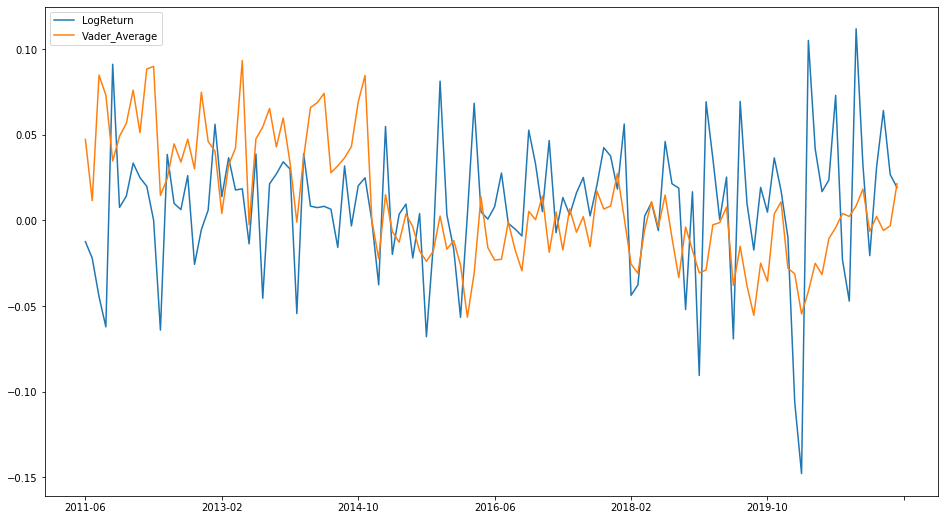

In [267]:
Granger_data_monthly[['LogReturn','Vader_Average']].plot(legend=True, figsize=(16,9))

In [301]:
corr = Granger_data_daily[['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average', 'LogReturn']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Vader_Compound,Flair_Score,SentimentScoreAdj,Vader_Average,LogReturn
Vader_Compound,1.000000,0.345188,0.385480,0.921830,0.019388
Flair_Score,0.345188,1.000000,0.194689,0.334575,0.033632
SentimentScoreAdj,0.385480,0.194689,1.000000,0.362382,0.022024
Vader_Average,0.921830,0.334575,0.362382,1.000000,0.012869
LogReturn,0.019388,0.033632,0.022024,0.012869,1.000000


In [350]:
pvals = [] 
for col in ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average']:
    pvals.append(scipy.stats.linregress(Granger_data_daily['LogReturn'][1:], Granger_data_daily[col][1:].dropna())[3])
corr_signif = pd.DataFrame(pvals,columns = ['p-value']
                           ,index = ['Vader_Compound','Flair_Score','SentimentScoreAdj','Vader_Average'])
corr_signif

,p-value
Vader_Compound,0.057169
Flair_Score,0.110594
SentimentScoreAdj,0.235809
Vader_Average,0.066000
